#### EP4130: Data Science Analysis

#### Assignment 4

#### Ranveer Sahu (ES21BTECH11025)



**Question 1**

Download the data corresponding to $x , y , \sigma_y$ given at http://www.iith.ac.in/~shantanud/testdata.dat

Find the best-fit values after fitting the data to linear, quadratic, and cubic polynomials. Find out which model fits the data best from frequentist model comparison as well as using AIC and BIC. For frequentist model comparison, using the linear model as the null hypothesis, find out the p value corresponding to the preferred model. (or if the linear model is the prefered model, then compare it to the quadratic model). Also show a plot overlaying the data with best fit solutions from linear, quadratic and cubic functions with different line
styles for each of the fits.

In [331]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.stats import chi2,norm

In [332]:
data = np.array([
[0.417022004703, 0.121328306045, 0.1],
[0.720324493442, 0.849527236006, 0.1],
[0.000114374817345, -1.01701405804, 0.1],
[0.302332572632, -0.391715712054, 0.1],
[0.146755890817, -0.680729552205, 0.1],
[0.0923385947688, -0.748514873007, 0.1],
[0.186260211378, -0.702848628623, 0.1],
[0.345560727043, -0.0749939588554, 0.1],
[0.396767474231, 0.041118449128, 0.1],
[0.538816734003, 0.418206374739, 0.1],
[0.419194514403, 0.104198664639, 0.1],
[0.685219500397, 0.7715919786, 0.1],
[0.204452249732, -0.561583800669, 0.1],
[0.878117436391, 1.43374816145, 0.1],
[0.0273875931979, -0.971263541306, 0.1],
[0.670467510178, 0.843497249235, 0.1],
[0.417304802367, -0.0604131723596, 0.1],
[0.558689828446, 0.389838628615, 0.1],
[0.140386938595, -0.768234900293, 0.1],
[0.198101489085, -0.649073386002, 0.1],
])

x = data[: , 0]
y = data[: , 1]
sigma_y= data[: , 2]

In [333]:
def linear_fit(x , m , b):
    return m * x + b

def quadratic_fit(x , a , b , c):
    return a * (x**2) + b * x  + c

def cubic_fit(x , a , b , c , d):
    return a * (x**3) + b * (x**2) + c * x + d

In [334]:
def y_predict(param_opt , x ):
    if len(param_opt) == 2:
        return np.array([linear_fit(x_data , param_opt[0] , param_opt[1]) for x_data in x])
    elif len(param_opt) == 3:
        return np.array([quadratic_fit(x_data , param_opt[0] , param_opt[1] , param_opt[2]) for x_data in x])
    elif len(param_opt) == 4:
        return np.array([cubic_fit(x_data , param_opt[0] , param_opt[1] , param_opt[2] , param_opt[3]) for x_data in x])

In [335]:
def chi_likelyhood(param_opt, x , y , sigma_y):
    y_predicted = y_predict(param_opt , x )# finding the y_predicted values
    
    chi2 = np.sum(((y - y_predicted)**2) / (sigma_y**2))
    dof = len(x) - len(param_opt)                     
    return sp.stats.chi2(dof).pdf(chi2)                         

In [336]:
def log_likelyhood(x , loc , scale):
    return -0.5 * (np.log((2 * np.pi * scale**2)) + ((x - loc)/scale)**2)

In [337]:
def AIC(param_opt , x , y , sigma_y):
    # finding the y_predicted values
    y_predicted = y_predict(param_opt , x)
    log_likelyhoods = np.sum(np.array([log_likelyhood(y_data , y_predicted[i] , sigma_y[i]) for i , y_data in enumerate(y)]))
    free_para = len(param_opt)
    return -2 * log_likelyhoods + 2 * free_para # formula for AIC

In [338]:
def BIC(param_opt , x , y , sigma_y):
    y_predicted = y_predict(param_opt , x )
    log_likelyhoods = np.sum(np.array([log_likelyhood(y_data , y_predicted[i] , sigma_y[i]) for i , y_data in enumerate(y)]))
    free_para = len(param_opt)
    return -2 * log_likelyhoods +  free_para * np.log(len(x))


In [339]:
def pvalue(param_opt , param_opt_wrt , x , y , sigma_y):
    # finding the difference in chi square likelyhoods for both models
    chi_diff = chi_likelyhood(param_opt_wrt , x , y , sigma_y) - chi_likelyhood(param_opt , x , y , sigma_y)
    dof = np.abs(len(param_opt) - len(param_opt_wrt))
    return 1 - sp.stats.chi2(dof).cdf(chi_diff)     # finding the pvalue

In [340]:
from scipy.optimize import curve_fit

opt_lin_param , _ = curve_fit(linear_fit , x , y , sigma = sigma_y)
opt_quad_param , _ = curve_fit(quadratic_fit , x , y , sigma = sigma_y)
opt_cub_param , _ = curve_fit(cubic_fit , x , y , sigma = sigma_y)

print("The best fit value for linear model is {}".format(opt_lin_param))
print("The best fit value for Quadratic model is {}".format(opt_quad_param))
print("The best fit value for cubic model is {}".format(opt_cub_param))

The best fit value for linear model is [ 2.79789861 -1.11028082]
The best fit value for Quadratic model is [ 0.50261293  2.38475187 -1.05578915]
The best fit value for cubic model is [-0.9672499   1.74451328  1.97184058 -1.02910463]


**Chi-square likelyhoods**

In [341]:
print("The chi-square likelyhood for the linear fit is {}".format(chi_likelyhood(opt_lin_param , x , y , sigma_y)))
print("The chi-square likelyhood for the quadratic fit is {}".format(chi_likelyhood(opt_quad_param , x , y , sigma_y)))
print("The chi-square likelyhood for the cubic fit is {}".format(chi_likelyhood(opt_cub_param , x , y , sigma_y)))

The chi-square likelyhood for the linear fit is 0.0453837955859186
The chi-square likelyhood for the quadratic fit is 0.036608447550140234
The chi-square likelyhood for the cubic fit is 0.04215280601006016


Since the likelyhood of seeing the data given the linear model is maximum, the linear model is favoured.

**AIC and BIC values**

In [342]:

print("AIC value(linear fit) is {}".format(AIC(opt_lin_param , x , y , sigma_y)))
print("AIC value(quadratic fit) is {}".format(AIC(opt_quad_param , x , y , sigma_y)))
print("AIC value(cubic fit) is {}".format(AIC(opt_cub_param , x , y , sigma_y)))
print("\n")
print("BIC value (linear fit) is {}".format(BIC(opt_lin_param , x , y , sigma_y)))
print("BIC value (quadratic fit) is {}".format(BIC(opt_quad_param , x , y , sigma_y)))
print("BIC value (cubic fit) is {}".format(BIC(opt_cub_param , x , y , sigma_y)))

AIC value(linear fit) is -40.03668681607269
AIC value(quadratic fit) is -39.849820624005616
AIC value(cubic fit) is -38.260818517602544


BIC value (linear fit) is -38.04522226896471
BIC value (quadratic fit) is -36.862623803343645
BIC value (cubic fit) is -34.27788942338658


minimum AIC and BIC values point to the linear model.

**for linear = NULL Hypothesis & find the p-values for quadratic and cubic models**

In [343]:
print("p-value of the quadratic model wrt linear model is {}".format(pvalue(opt_quad_param , opt_lin_param , x , y , sigma_y)))
print("p-value of the cubic model wrt linear model is {}".format(pvalue(opt_cub_param , opt_lin_param , x , y , sigma_y)))

p-value of the quadratic model wrt linear model is 0.9253658781854517
p-value of the cubic model wrt linear model is 0.9983858094213667


The high values mean the models are very similar.

**PLOTS**

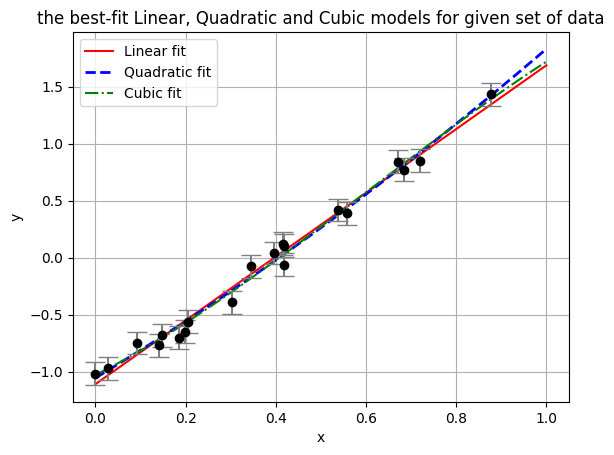

In [344]:
x_plot = np.linspace(0, 1, 2500)
plt.plot(x_plot , y_predict(opt_lin_param , x_plot) , 'r-',label = "Linear fit")
plt.plot(x_plot , y_predict(opt_quad_param , x_plot) , 'b--' , linewidth = 2 ,label = "Quadratic fit")
plt.plot(x_plot , y_predict(opt_cub_param , x_plot) , 'g-.',label = "Cubic fit")
plt.errorbar(x, y, yerr = sigma_y , fmt = 'ko', ecolor = 'gray' , capsize = 7)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("the best-fit Linear, Quadratic and Cubic models for given set of data")
plt.legend()
plt.show()

**Question 2**
For the model comparison problem shown in class on JVDP’s blog, calculate AIC and BIC for the linear and quadratic models. Do these results agree with the frequentist model comparison results shown on the blog? Also mention the qualitative significance using strengt of evidence rules.

Link : http://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/

In [345]:
# data from JDVP

data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
x, y, sigma_y = data

In [346]:
opt_linear_param , _ = sp.optimize.curve_fit(linear_fit , x , y , sigma = sigma_y)
opt_quadratic_param , _ = sp.optimize.curve_fit(quadratic_fit , x , y , sigma = sigma_y)

**finding the AIC and BIC**

In [347]:
print("AIC value for (linear fit) is {}".format(AIC(opt_linear_param , x , y , sigma_y)))
print("AIC value for (quadratic fit) is {}".format(AIC(opt_quadratic_param , x , y , sigma_y)))
print("\n")
print("BIC value for (linear fit) is {}".format(BIC(opt_linear_param , x , y , sigma_y)))
print("BIC value for (quadratic fit) is {}".format(BIC(opt_quadratic_param , x , y , sigma_y)))

AIC value for (linear fit) is -40.02173401322526
AIC value for (quadratic fit) is -39.883027173008216


BIC value for (linear fit) is -38.03026946611728
BIC value for (quadratic fit) is -36.895830352346245


Both the AIC and BIC values agree with the linear model, which validates JVDP's blog.

In [348]:
print("According to the strength of the evidence, delta_AIC = {} and delta_BIC = {}, which says the quadratic model is not very favoured.".\
    format(AIC(opt_quadratic_param , x , y , sigma_y) - AIC(opt_linear_param , x , y , sigma_y) , \
        BIC(opt_quadratic_param , x , y , sigma_y) - BIC(opt_linear_param , x , y , sigma_y)))

According to the strength of the evidence, delta_AIC = 0.13870684021704704 and delta_BIC = 1.1344391137710375, which says the quadratic model is not very favoured.


**Question 3**

Find out one paper in research literature which uses the Kolmogorov Smirnov test and explain briefly how it was used in that paper. Is K-S test used incorrectly (in this paper) as per the warnings on the Penn State website discussed in class?

Answer:

https://arxiv.org/pdf/2211.00578.pdf

The paper uses both the one-sample and two-sample KS tests. The one-sample KS test is used to figure out if the uncertanities in the Hubble constant can be modeled using a Gaussian Distribution. This does not violate the Penn State University warning as the constant is a one dimensional sample. Moreover, they also use the two-sample KS test to find which of the anchor galaxies are different from the others, if any, and use the results to improvise on their results.

In the paper by by N.D. Gagunashvili, on the comparison of weighted and unweighted histograms where it is being discussed that, that how X^2 test are used for histograms for different events, the K.S. test for histograms about different statistics of event.

another reference:
Gagunashvili N 2006 Comparison of weighted and unweighted histograms arXiv: physics/0605123

**Question 4**

Calculate the significance in terms of no of sigmas of the Higgs boson
discovery claim from the p value given in the abstract of the ATLAS
discovery paper, arXiv:1207.7214.


Do the same for the LIGO discovery of GW150914, for which the p
value = 2 × $10^{-7}$


From the Super-K discovery paper for neutrino oscillations (hep-
ex/9807003), calculate the $\chi^2$ GOF using the best-fit $\nu_\mu \leftrightarrow \nu_\tau$  oscillation solution.

In [349]:

hgs_pval = [10**-1, 10**-2, 10**-3, 10**-5, 10**-7, 10**-9]
hgs_sign = norm.isf(hgs_pval)


In [350]:

p_val_ligo = 2*10**-7
sign_ligo = norm.isf(p_val_ligo)


In [351]:

# print
print('Significance in terms of no. of sigmas for higgs boson: ', hgs_sign)
print('Significance in terms of no. of sigmas for LIGO discovery: ', sign_ligo)


Significance in terms of no. of sigmas for higgs boson:  [1.28155157 2.32634787 3.09023231 4.26489079 5.19933758 5.99780702]
Significance in terms of no. of sigmas for LIGO discovery:  5.068957749717791


In [352]:
chi_square = 65.2
dof = 67
chi_square_gof = 1-chi2(dof).cdf(chi_square)

In [353]:
print('chi-square GOF is: ', chi_square_gof)

chi-square GOF is:  0.5394901931099038
